### PROJET SQL - ANALYSE DES DONNÉES DU MAGASIN DE MUSIQUE

###### Dans le cadre de ce projet, nous avons entrepris une analyse approfondie des données d'un magasin de musique en utilisant MySQL pour explorer les comportements d'achat des clients, identifier les tendances de vente, et mieux comprendre les performances des artistes et des genres musicaux. À travers une série de requêtes SQL, nous avons extrait des informations clés sur les ventes, les clients et les produits.Ce projet se compose de plusieurs séries de questions, allant des analyses simples aux requêtes plus complexes, afin de répondre à des problématiques variées telles que :Identification des artistes les plus populaires et des genres musicaux dominants.
###### Nous avons également prévu d'utiliser des outils comme Pandas, Matplotlib, et NumPy pour créer des visualisations qui illustrent nos découvertes. En outre, nous développerons un tableau de bord interactif sur Power BI ou Tableau, permettant de visualiser en temps réel les données analysées et de mieux saisir les tendances et les relations.




##### Partie 1 

#####                           Série de questions 1 – Facile

- connexion à la base de donnée MYSQL 

In [142]:
import mysql.connector
from mysql.connector import Error

In [143]:
# Connexion à la base de données MySQL

conn = mysql.connector.connect(
        host="127.0.0.1",
        port=3306,
        user="root",
        password="",  # Remplacez par votre mot de passe MySQL
        database="music_store_data"  # Remplacez par le nom de votre base de données
    )


In [144]:
# Créer un curseur
cursor = conn.cursor()

 1. Qui est l'employé le plus ancien en fonction du titre du poste ?

In [145]:
# Première requete 
query2 = """
SELECT title, first_name, last_name
FROM employee
ORDER BY title DESC
LIMIT 1;
"""

cursor.execute(query2)
result2 = cursor.fetchone()

if result2:
    title, first_name, last_name = result2
    print(f"L'employé le plus ancien: Title: {title}, First Name: {first_name}, Last Name: {last_name}")

L'employé le plus ancien: Title: Senior General Manager, First Name: Mohan, Last Name: Madan


2. Quels pays ont le plus de factures ?

In [146]:
#Deuxième requete 
query1 = """
SELECT COUNT(*) AS invoice_count, billing_country
FROM invoice
GROUP BY billing_country
ORDER BY invoice_count DESC;
"""

cursor.execute(query1)
results1 = cursor.fetchall()

print("les pays qui ont le plus de factures:")
for count, country in results1:
    print(f"Country: {country}, Invoice Count: {count}")

les pays qui ont le plus de factures:
Country: USA, Invoice Count: 86
Country: Canada, Invoice Count: 46
Country: Brazil, Invoice Count: 38
Country: France, Invoice Count: 35
Country: Germany, Invoice Count: 27
Country: Portugal, Invoice Count: 19
Country: Czech Republic, Invoice Count: 16
Country: India, Invoice Count: 16
Country: United Kingdom, Invoice Count: 15
Country: Chile, Invoice Count: 11
Country: Denmark, Invoice Count: 8
Country: Norway, Invoice Count: 8
Country: Hungary, Invoice Count: 8
Country: Spain, Invoice Count: 7
Country: Ireland, Invoice Count: 7
Country: Finland, Invoice Count: 7
Country: Poland, Invoice Count: 7
Country: Netherlands, Invoice Count: 7
Country: Belgium, Invoice Count: 6
Country: Italy, Invoice Count: 5
Country: Sweden, Invoice Count: 5
Country: Australia, Invoice Count: 4
Country: Argentina, Invoice Count: 4
Country: Austria, Invoice Count: 4


3. Quelles sont les 3 valeurs principales de la facture totale ?

In [147]:
# Troisième requête : obtenir les trois plus grosses factures
query3 = """
SELECT total
FROM invoice
ORDER BY total DESC
LIMIT 3;
"""

cursor.execute(query3)
results3 = cursor.fetchall()

print("les trois plus grosses factures:")
for total in results3:
    print(f"Total Invoice: {total[0]}")

les trois plus grosses factures:
Total Invoice: 23.76
Total Invoice: 19.80
Total Invoice: 19.80


4. Quelle ville a les meilleurs clients ? Nous aimerions organiser un festival de musique promotionnel dans la ville où nous avons 
gagné le plus d'argent. Écrivez une requête qui renvoie une ville qui a la somme la plus élevée de factures totales. Renvoie à 
la fois le nom de la ville et la somme de toutes les factures totaux 

In [28]:
#Quatrième requete 

query4 = """
SELECT billing_city,SUM(total)
FROM music_store_data.invoice
GROUP BY billing_city
ORDER BY SUM(total) DESC
LIMIT 1;
"""
#Exécution de la quatrième requete
cursor.execute(query4)
#Récupération des données de la quatrième requete
resultat4 = cursor.fetchall()
#Affichage des données de la quatrième requete
print(f"La ville avec les meilleures clients : {resultat4}")


La ville avec les meilleures clients : [('Prague', Decimal('144.54'))]


5. Qui est le meilleur client ? Le client qui a dépensé le plus d'argent sera déclaré meilleur client. Écrivez une requête qui renvoie 
la personne qui a dépensé le plus d'argent.

In [29]:
#Cinquième requete : le meilleur client

query5 = """
SELECT customer.customer_id, first_name, last_name, SUM(total) AS total_spending
FROM music_store_data.customer
JOIN invoice ON customer.customer_id = invoice.customer_id
GROUP BY customer.customer_id
ORDER BY total_spending DESC
LIMIT 1;
"""
# Exécution de la requête 5
cursor.execute(query5)
# Récupération des résultats
results5 = cursor.fetchall()
# Affichage des résultats
print(f"Le meilleure client  :{results5}")


Le meilleure client  :[('58', 'Manoj', 'Pareek', Decimal('89.10'))]


##### Série de questions 2 – Modéré

1. Écrivez une requête pour renvoyer l'e-mail, le prénom, le nom et le genre de toute la musique rock auditeurs. Renvoyez votre liste classée par ordre alphabétique par email en commençant par A

In [30]:
#Sixième requete : obtenir les clients dont le genre contient "Rock" et l'email commence par 'a'

query6 = """
SELECT customer.email, customer.first_name, customer.last_name, genre.name AS genre
FROM customer, genre
WHERE genre.name LIKE '%Rock%' AND customer.email LIKE 'a%'
ORDER BY customer.email ASC;
"""
#Exécution de la requete 6
cursor.execute(query6)
#Récupération des données
resultat6 = cursor.fetchall()
#Affichage des données
print(f"les clients qui écoutent du  Rock et l'email commence par 'a': {resultat6}")

les clients qui écoutent du  Rock et l'email commence par 'a': [('aaronmitchell@yahoo.ca', 'Aaron', 'Mitchell', 'Rock'), ('aaronmitchell@yahoo.ca', 'Aaron', 'Mitchell', 'Rock And Roll'), ('alero@uol.com.br', 'Alexandre', 'Rocha', 'Rock And Roll'), ('alero@uol.com.br', 'Alexandre', 'Rocha', 'Rock'), ('astrid.gruber@apple.at', 'Astrid', 'Gruber', 'Rock'), ('astrid.gruber@apple.at', 'Astrid', 'Gruber', 'Rock And Roll')]


2. Invitons les artistes qui ont écrit le plus de musique rock dans notre ensemble de données. Écrivez un requête qui renvoie le nom de l'artiste et le nombre total de pistes des 10 meilleurs groupes de rock


In [31]:
# Septième requête : obtenir les artistes et le nombre de pistes associées au genre "Rock"

query7 = """
SELECT artist.name AS artist_name, COUNT(track.track_id) AS track_count
FROM music_store_data.artist
JOIN album ON artist.artist_id = album.artist_id
JOIN track ON album.album_id = track.album_id
JOIN genre ON track.genre_id = genre.genre_id
WHERE genre.name = 'Rock'
GROUP BY artist.name
ORDER BY track_count DESC
LIMIT 10;
"""
cursor.execute(query7)
results7 = cursor.fetchall()

print("Top 10 des Artists avec des musiques dans le genre 'Rock':")
for artist_name, track_count in results7:
    print(f"Artist: {artist_name}, Track Count: {track_count}")

Top 10 des Artists avec des musiques dans le genre 'Rock':
Artist: Led Zeppelin, Track Count: 114
Artist: U2, Track Count: 112
Artist: Deep Purple, Track Count: 92
Artist: Iron Maiden, Track Count: 81
Artist: Pearl Jam, Track Count: 54
Artist: Van Halen, Track Count: 52
Artist: Queen, Track Count: 45
Artist: The Rolling Stones, Track Count: 41
Artist: Creedence Clearwater Revival, Track Count: 40
Artist: Kiss, Track Count: 35


3. Renvoie tous les noms de pistes dont la longueur de chanson est supérieure à la longueur moyenne des chansons Renvoie le nom et les millisecondes de chaque piste. Trier par longueur de chanson, les chansons les plus longues étant  répertoriées en premier


In [32]:
# Huitième requête : obtenir les pistes avec une durée supérieure à la moyenne
query8 = """
SELECT track.name, track.milliseconds
FROM music_store_data.track
WHERE track.milliseconds > (SELECT AVG(milliseconds) FROM track)
ORDER BY track.milliseconds DESC;
"""

cursor.execute(query8)
results8 = cursor.fetchall()

print("les pistes avec une durée supérieure à la moyenne:")
for track_name, milliseconds in results8:
    print(f"Track Name: {track_name}, Duration: {milliseconds} ms")

les pistes avec une durée supérieure à la moyenne:
Track Name: Occupation / Precipice, Duration: 5286953 ms
Track Name: Through a Looking Glass, Duration: 5088838 ms
Track Name: Greetings from Earth, Pt. 1, Duration: 2960293 ms
Track Name: The Man With Nine Lives, Duration: 2956998 ms
Track Name: Battlestar Galactica, Pt. 2, Duration: 2956081 ms
Track Name: Battlestar Galactica, Pt. 1, Duration: 2952702 ms
Track Name: Murder On the Rising Star, Duration: 2935894 ms
Track Name: Battlestar Galactica, Pt. 3, Duration: 2927802 ms
Track Name: Take the Celestra, Duration: 2927677 ms
Track Name: Fire In Space, Duration: 2926593 ms
Track Name: The Long Patrol, Duration: 2925008 ms
Track Name: The Magnificent Warriors, Duration: 2924716 ms
Track Name: The Living Legend, Pt. 1, Duration: 2924507 ms
Track Name: The Gun On Ice Planet Zero, Pt, Duration: 2924341 ms
Track Name: The Hand of God, Duration: 2924007 ms
Track Name: Experiment In Terra, Duration: 2923548 ms
Track Name: War of the Gods, Pt

##### Série de questions 3 – Avancement

1. Trouvez combien d'argent dépensé par chaque client pour les artistes ? Écrivez une requête pour revenir nom du client, nom de l'artiste et total dépensé

In [33]:
# Requête pour trouver le montant dépensé par chaque client pour les artistes
query9 = """
SELECT customer.first_name, customer.last_name, artist.name AS artist_name, SUM(invoice_line.unit_price * invoice_line.quantity) AS total_spent
FROM music_store_data.customer
JOIN invoice ON customer.customer_id = invoice.customer_id
JOIN invoice_line ON invoice.invoice_id = invoice_line.invoice_id
JOIN track ON invoice_line.track_id = track.track_id
JOIN album ON track.album_id = album.album_id
JOIN artist ON album.artist_id = artist.artist_id
GROUP BY customer.customer_id, artist.artist_id
ORDER BY total_spent DESC;
"""

cursor.execute(query9)
results9 = cursor.fetchall()

print("le montant dépensé par chaque client pour les artistes:")
for first_name, last_name, artist_name, total_spent in results9:
    print(f"Client: {first_name} {last_name}, Artist: {artist_name}, Total Spent: ${total_spent:.2f}")


le montant dépensé par chaque client pour les artistes:
Client: Wyatt Girard, Artist: Frank Sinatra, Total Spent: $23.76
Client: Aaron Mitchell, Artist: James Brown, Total Spent: $19.80
Client: François Tremblay, Artist: The Who, Total Spent: $19.80
Client: Ladislav Kovács, Artist: The Cult, Total Spent: $17.82
Client: Mark Taylor, Artist: The Clash, Total Spent: $17.82
Client: Camille Bernard, Artist: Marisa Monte, Total Spent: $17.82
Client: Richard Cunningham, Artist: Marvin Gaye, Total Spent: $17.82
Client: François Tremblay, Artist: Queen, Total Spent: $16.83
Client: Helena Holý, Artist: Jimi Hendrix, Total Spent: $16.83
Client: Roberto Almeida, Artist: Jimi Hendrix, Total Spent: $16.83
Client: Patrick Gray, Artist: Nirvana, Total Spent: $16.83
Client: João Fernandes, Artist: Queen, Total Spent: $16.83
Client: Michelle Brooks, Artist: Guns N' Roses, Total Spent: $15.84
Client: Fernanda Ramos, Artist: Red Hot Chili Peppers, Total Spent: $15.84
Client: Jennifer Peterson, Artist: Aer

2. Nous voulons connaître le genre musical le plus populaire pour chaque pays. Nous déterminons le genre le plus populaire 
comme étant celui qui a le plus grand nombre d'achats. Écrivez une requête qui renvoie chaque pays ainsi que le genre le plus populaire. Pour les pays où le nombre maximum d'achats est partagé, renvoyez tous les genres


In [148]:
# Requête principale
query_genre_popular = """
SELECT 
    gs.billing_country, 
    gs.genre_name, 
    gs.purchase_count
FROM 
    genre_sales AS gs
JOIN 
    (SELECT billing_country, MAX(purchase_count) AS max_purchase
     FROM genre_sales
     GROUP BY billing_country) AS max_sales
ON 
    gs.billing_country = max_sales.billing_country 
    AND gs.purchase_count = max_sales.max_purchase
ORDER BY 
    gs.billing_country, gs.genre_name;
"""

cursor.execute(query_genre_popular)
results_genre_popular = cursor.fetchall()

# Affichage des résultats
print("Le genre musical le plus populaire par pays :")
for billing_country, genre_name, purchase_count in results_genre_popular:
    print(f"Country: {billing_country}, Popular Genre: {genre_name}, Purchases: {purchase_count}")

ProgrammingError: 1146 (42S02): Table 'music_store_data.genre_sales' doesn't exist

3- Écrivez une requête qui détermine le client qui a dépensé le plus en musique pour chaque pays. Écrivez une requête qui renvoie le pays ainsi que le client le plus important et combien ils ont dépensé. Pour les pays où le montant le plus dépensé est partagé, indiquez tous les clients qui ont dépensé 


In [ ]:
# Requête pour trouver le client qui a dépensé le plus par pays
query_top_spender = """
SELECT billing_country, customer.first_name, customer.last_name, SUM(invoice_line.unit_price * invoice_line.quantity) AS total_spent
FROM invoice
JOIN invoice_line ON invoice.invoice_id = invoice_line.invoice_id
JOIN customer ON invoice.customer_id = customer.customer_id
GROUP BY billing_country, customer.customer_id
HAVING total_spent = (
    SELECT MAX(sub_total_spent)
    FROM (
        SELECT SUM(invoice_line.unit_price * invoice_line.quantity) AS sub_total_spent
        FROM invoice
        JOIN invoice_line ON invoice.invoice_id = invoice_line.invoice_id
        WHERE invoice.billing_country = outer_invoice.billing_country
        GROUP BY customer.customer_id
    ) AS subquery
)
ORDER BY billing_country, total_spent DESC;
"""

cursor.execute(query_top_spender)
results_top_spender = cursor.fetchall()

print("Top Spender by Country:")
for billing_country, first_name, last_name, total_spent in results_top_spender:
    print(f"Country: {billing_country}, Customer: {first_name} {last_name}, Total Spent: ${total_spent:.2f}")

ProgrammingError: 1054 (42S22): Unknown column 'outer_invoice.billing_country' in 'where clause'

: 

##### Partie 2 

In [122]:
# Importer et intaller les bibliothèques 
import pandas as pd
%pip install numpy
import matplotlib.pyplot as plt
import seaborn as sns
import os
%pip install adjustText


[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: C:\Users\HP\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip



Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: C:\Users\HP\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [71]:
# Chemin du dossier où sont stockés les fichiers CSV
folder_path = 'C:\\Users\\HP\\Documents\\DEV DATA PROMO 6\\Data Science et le Machine Learning\\Python for datascience\\Document'

# Liste des noms de fichiers CSV dans l'ordre souhaité
file_names = [
    'album.csv', 'artist.csv', 'customer.csv', 'employee.csv', 
    'genre.csv', 'invoice.csv', 'invoice_line.csv', 'media_type.csv', 
    'playlist.csv', 'playlist_track.csv', 'track.csv'
]

# Crée un dictionnaire pour stocker chaque DataFrame
data_frames = {}

# Importer chaque fichier CSV dans un DataFrame distinct et les stocker dans le dictionnaire
for file_name in file_names:
    file_path = os.path.join(folder_path, file_name)
    # Utiliser le nom du fichier (sans extension) comme clé dans le dictionnaire
    data_frames[file_name.split('.')[0]] = pd.read_csv(file_path)

# Maintenant chaque DataFrame est accessible via son nom
album = data_frames['album']
artist = data_frames['artist']
customer = data_frames['customer']
employee = data_frames['employee']
genre = data_frames['genre']
invoice = data_frames['invoice']
invoice_line = data_frames['invoice_line']
media_type = data_frames['media_type']
playlist = data_frames['playlist']
playlist_track = data_frames['playlist_track']
track = data_frames['track']

1- Calculez le total des ventes pour chaque genre musical

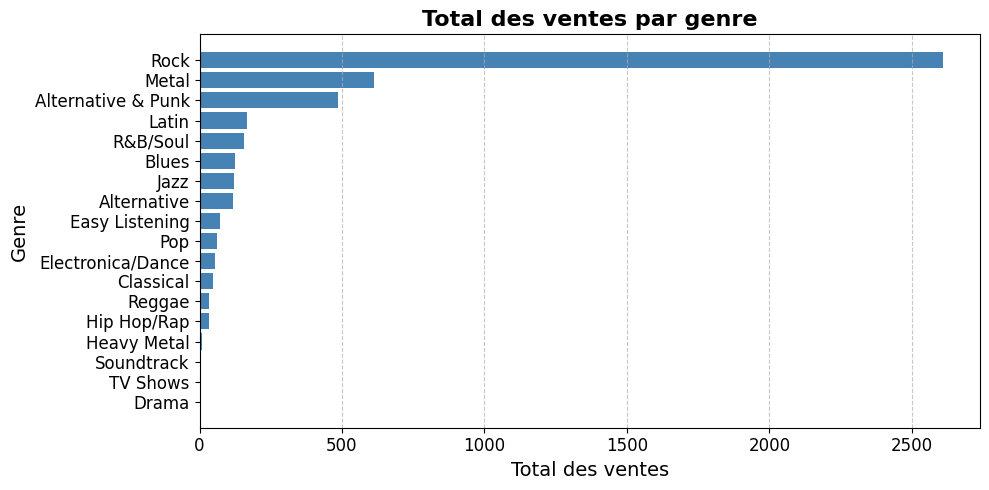

In [68]:
# Joindre les tables sans sélection pour vérifier les colonnes
ventes_par_genre = (
    invoice
    .merge(invoice_line, on="invoice_id")
    .merge(track, on="track_id")
    .merge(genre, on="genre_id")
)

# Vérifier les noms de colonnes
#print(ventes_par_genre.columns)

# Joindre les données avec sélection des colonnes
ventes_par_genre = (
    invoice
    .merge(invoice_line, on="invoice_id")
    .merge(track, on="track_id")
    .merge(genre, on="genre_id")
    [['name_y', 'unit_price_x', 'quantity']]  # Sélectionner la colonne 'name' pour le genre, 'unit_price', et 'quantity'
)

# Renommer la colonne du genre pour plus de clarté
ventes_par_genre = ventes_par_genre.rename(columns={'name_y': 'genre_name'})

# Calculer le total des ventes par genre
ventes_par_genre['total'] = ventes_par_genre['unit_price_x'] * ventes_par_genre['quantity']
ventes_par_genre_totales = (
    ventes_par_genre
    .groupby('genre_name')
    .agg(total_ventes=('total', 'sum'))
    .reset_index()
)

# Afficher les résultats
#print(ventes_par_genre_totales)

# Trier les genres par le total des ventes pour une meilleure lisibilité
ventes_par_genre_totales = ventes_par_genre_totales.sort_values(by='total_ventes', ascending=True)

# Créer un graphique à barres horizontales avec des paramètres ajustés pour correspondre au style souhaité
plt.figure(figsize=(10, 5))
plt.barh(ventes_par_genre_totales['genre_name'], ventes_par_genre_totales['total_ventes'], color='steelblue')
plt.title("Total des ventes par genre", fontsize=16, weight='bold')
plt.xlabel("Total des ventes", fontsize=14)
plt.ylabel("Genre", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()  # Ajuster la mise en page pour éviter les coupures
plt.show()

2- Créez une distribution des montants dépensés par chaque client.

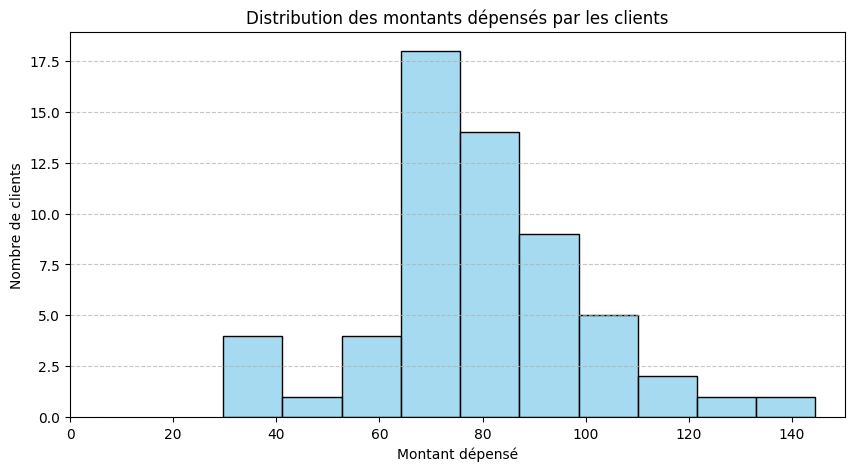

In [119]:
# Accéder à la DataFrame des factures
invoice = data_frames['invoice']

# Calculer le total dépensé par chaque client
depenses_par_client = invoice.groupby('customer_id')['total'].sum().reset_index()
depenses_par_client.columns = ['customer_id', 'total_depenses']

# Créer l'histogramme
plt.figure(figsize=(10, 5))
sns.histplot(depenses_par_client['total_depenses'], bins=10, kde=False, color='skyblue', edgecolor='black')
plt.title('Distribution des montants dépensés par les clients')
plt.xlabel('Montant dépensé')
plt.ylabel('Nombre de clients')
plt.xlim(left=0)  # Pour s'assurer que l'histogramme commence à 0
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

3- Examinez l'évolution des ventes mensuelles ou trimestrielles.

- Ventes mensuelles

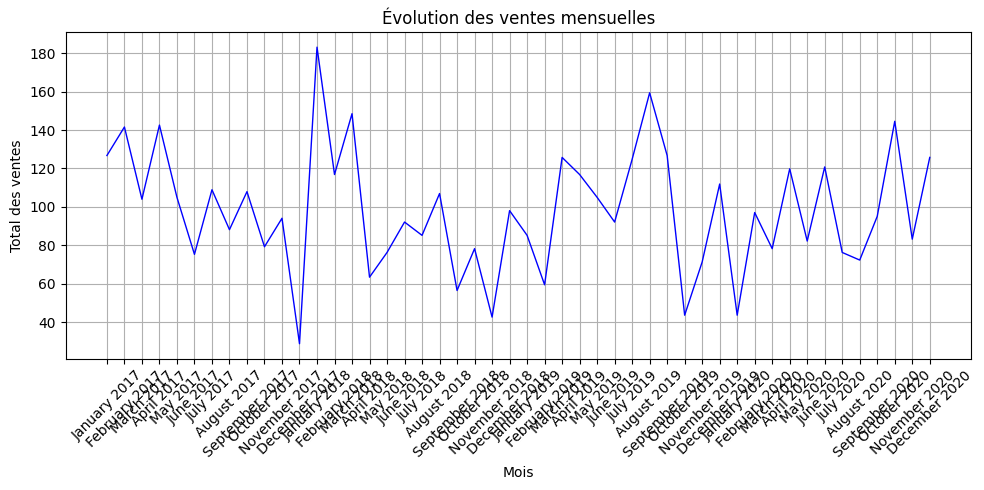

In [120]:
# Assurez-vous que la colonne de date est au bon format
invoice['invoice_date'] = pd.to_datetime(invoice['invoice_date'])

# Extraire le mois et l'année de la date de la facture
ventes_mensuelles = (
    invoice
    .assign(mois=invoice['invoice_date'].dt.to_period('M'))  # Créer une nouvelle colonne 'mois'
    .groupby('mois', as_index=False)  # Regrouper par 'mois'
    .agg(total_ventes=('total', 'sum'))  # Calculer la somme des ventes
)

# Convertir 'mois' en datetime pour le tracé et créer une colonne avec le nom du mois
ventes_mensuelles['mois'] = ventes_mensuelles['mois'].dt.to_timestamp()
ventes_mensuelles['nom_mois'] = ventes_mensuelles['mois'].dt.strftime('%B %Y')  # Nom du mois et année

# Afficher le DataFrame avec le nom du mois
#print(ventes_mensuelles[['nom_mois', 'total_ventes']])

# Graphique linéaire des ventes mensuelles
plt.figure(figsize=(10, 5))
sns.lineplot(data=ventes_mensuelles, x='nom_mois', y='total_ventes', color='blue', linewidth=1)
plt.title("Évolution des ventes mensuelles")
plt.xlabel("Mois")
plt.ylabel("Total des ventes")
plt.xticks(rotation=45)  # Rotation des étiquettes de l'axe des x pour une meilleure lisibilité
plt.grid()
plt.tight_layout()  # Ajuste les éléments pour éviter le chevauchement
plt.show()

- Ventes trimestrielles

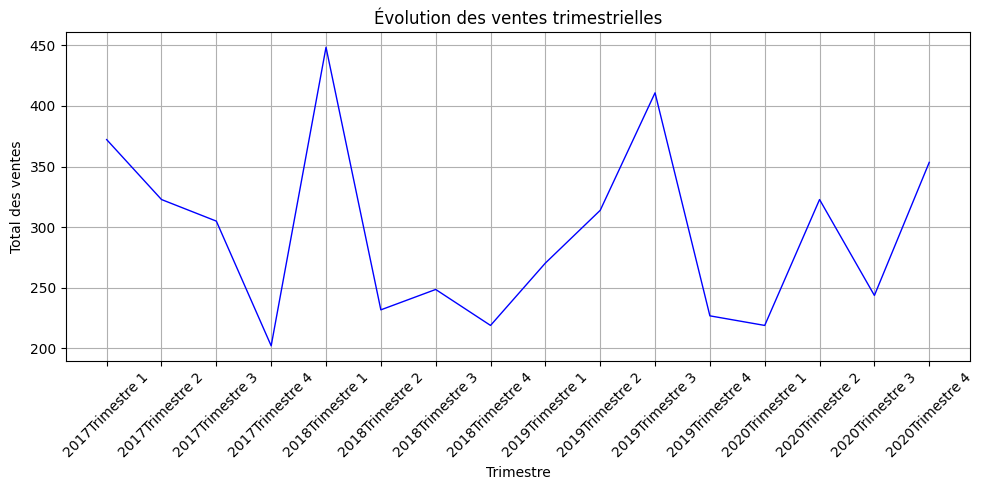

In [117]:
# Extraire le trimestre et l'année de la date de la facture
ventes_trimestrielles = (
    invoice
    .assign(trimestre=invoice['invoice_date'].dt.to_period('Q'))  # Créer une nouvelle colonne 'trimestre'
    .groupby('trimestre', as_index=False)  # Regrouper par 'trimestre'
    .agg(total_ventes=('total', 'sum'))  # Calculer la somme des ventes
)

# Convertir 'trimestre' en datetime pour le tracé
ventes_trimestrielles['trimestre'] = ventes_trimestrielles['trimestre'].dt.to_timestamp()

# Créer une nouvelle colonne avec les noms des trimestres
ventes_trimestrielles['nom_trimestre'] = ventes_trimestrielles['trimestre'].dt.to_period('Q').astype(str)
ventes_trimestrielles['nom_trimestre'] = ventes_trimestrielles['nom_trimestre'].str.replace('Q', 'Trimestre ', regex=False)

# Afficher le DataFrame avec le nom du trimestre
#print(ventes_trimestrielles[['nom_trimestre', 'total_ventes']])

# Graphique linéaire des ventes trimestrielles
plt.figure(figsize=(10, 5))
sns.lineplot(data=ventes_trimestrielles, x='nom_trimestre', y='total_ventes', color='blue', linewidth=1)
plt.title("Évolution des ventes trimestrielles")
plt.xlabel("Trimestre")
plt.ylabel("Total des ventes")
plt.xticks(rotation=45)  # Rotation des étiquettes de l'axe des x pour une meilleure lisibilité
plt.grid()
plt.tight_layout()  # Ajuste les éléments pour éviter le chevauchement
plt.show()

4- Identifiez les artistes qui ont généré le plus de revenus.

C:\Users\HP\AppData\Local\Temp\ipykernel_48260\996154619.py:9: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: (x['unit_price_x'] * x['quantity']).sum())


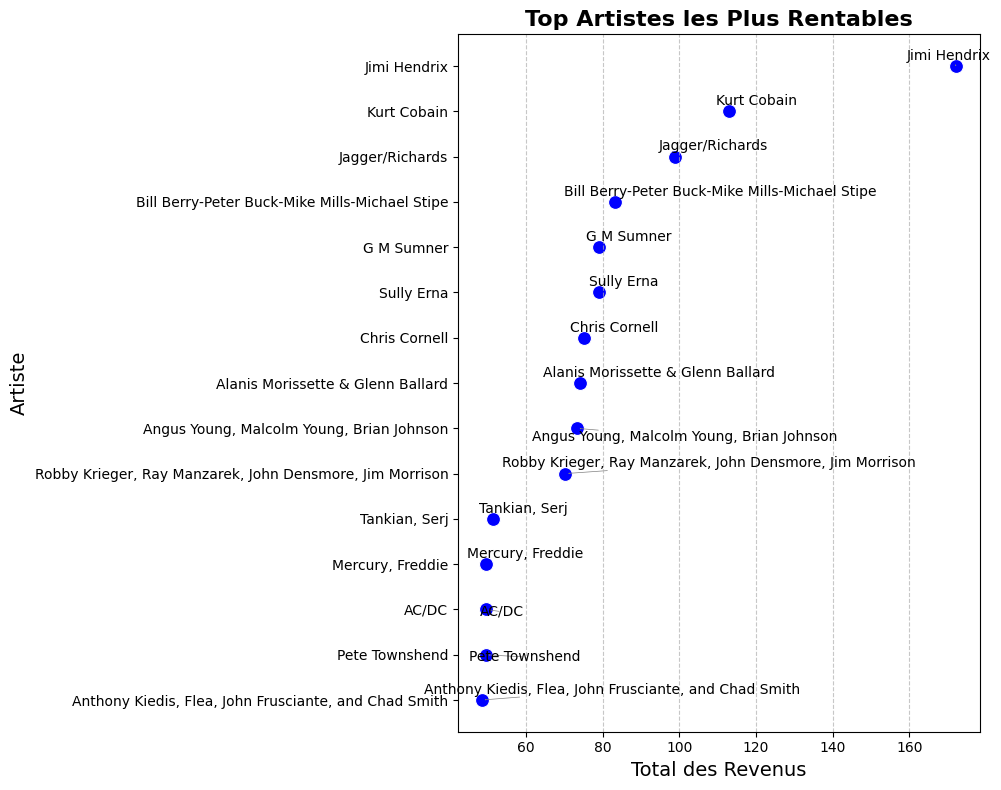

In [123]:
from adjustText import adjust_text  # Import adjustText après l'installation

# Joindre les tables `invoice_line`, `track`, et `genre`
revenus_data = invoice_line.merge(track, on='track_id').merge(genre, on='genre_id')

# Calculer les revenus totaux par artiste (composer)
revenus_par_artiste = (revenus_data
                       .groupby('composer')
                       .apply(lambda x: (x['unit_price_x'] * x['quantity']).sum())
                       .reset_index(name='total_revenus'))

# Trier par ordre décroissant des revenus
revenus_par_artiste = revenus_par_artiste.sort_values(by='total_revenus', ascending=False)

# Filtrer pour garder les 15 artistes les plus rentables
top_artistes = revenus_par_artiste.head(15)

# Créer le graphique
plt.figure(figsize=(10, 8))
sns.scatterplot(data=top_artistes, x='total_revenus', y='composer', color='blue', s=100)
plt.title("Top Artistes les Plus Rentables", fontsize=16, weight='bold')
plt.xlabel("Total des Revenus", fontsize=14)
plt.ylabel("Artiste", fontsize=14)

# Ajouter les noms des artistes en utilisant `adjust_text` pour éviter le chevauchement
texts = [plt.text(x=row['total_revenus'], y=row['composer'], s=row['composer'], fontsize=10)
         for _, row in top_artistes.iterrows()]
adjust_text(texts, arrowprops=dict(arrowstyle='->', color='grey', lw=0.5))

plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

5-Le nombre de clients par pays 

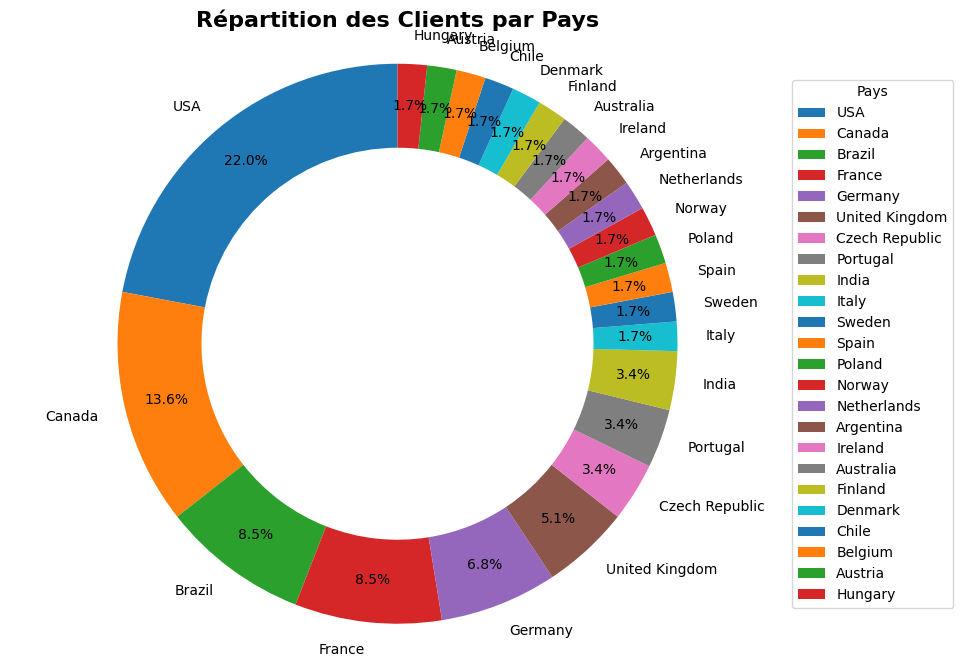

In [124]:
# Comptage du nombre de clients par pays
clients_par_pays = customer.groupby('country').size().reset_index(name='nombre_clients')
clients_par_pays = clients_par_pays.sort_values(by='nombre_clients', ascending=False)

# Création du graphique à secteurs
fig, ax = plt.subplots(figsize=(10, 8))
ax.pie(clients_par_pays['nombre_clients'], labels=clients_par_pays['country'], 
       autopct='%1.1f%%', startangle=90, wedgeprops=dict(width=0.3), pctdistance=0.85)

# Ajout de styles similaires à ggplot
plt.title("Répartition des Clients par Pays", fontsize=16, weight='bold')
ax.axis('equal')  # Assure un graphique circulaire

# Position de la légende
plt.legend(clients_par_pays['country'], title="Pays", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

plt.show()

6- Identifions les pistes ayant la durée la plus longue et leur popularité

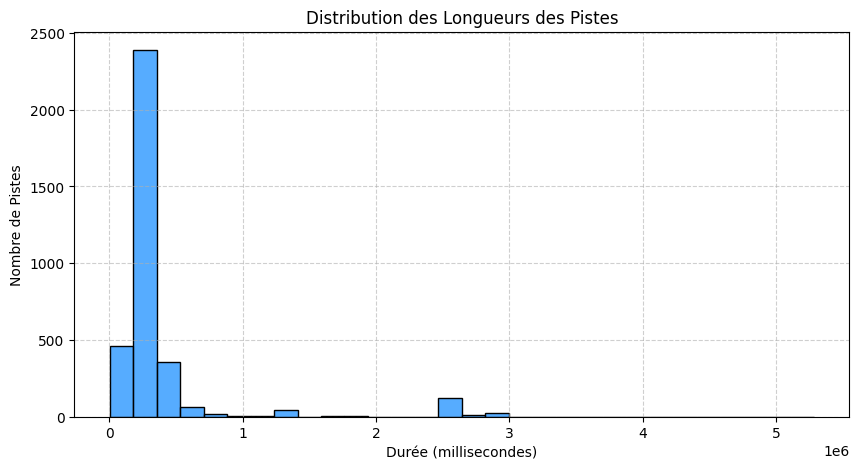

In [128]:
# Identifier les 10 pistes les plus longues
pistes_longues = track.sort_values(by='milliseconds', ascending=False).head(10)
pistes_longues = pistes_longues[['track_id', 'name', 'milliseconds']]  # Sélectionner les colonnes d'intérêt

# Afficher les pistes les plus longues
#print("Les 10 pistes les plus longues :")
#print(pistes_longues)

# Création de l'histogramme de la distribution des longueurs de pistes
plt.figure(figsize=(10, 5))
sns.histplot(track['milliseconds'], bins=30, color='dodgerblue', kde=False)

# Ajout de styles et labels
plt.title("Distribution des Longueurs des Pistes")
plt.xlabel("Durée (millisecondes)")
plt.ylabel("Nombre de Pistes")
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

7 - Calculons le total des factures pour chaque ville

C:\Users\HP\AppData\Local\Temp\ipykernel_48260\1976011103.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=total_factures_par_ville, x='total', y='billing_city', palette='Blues_d')


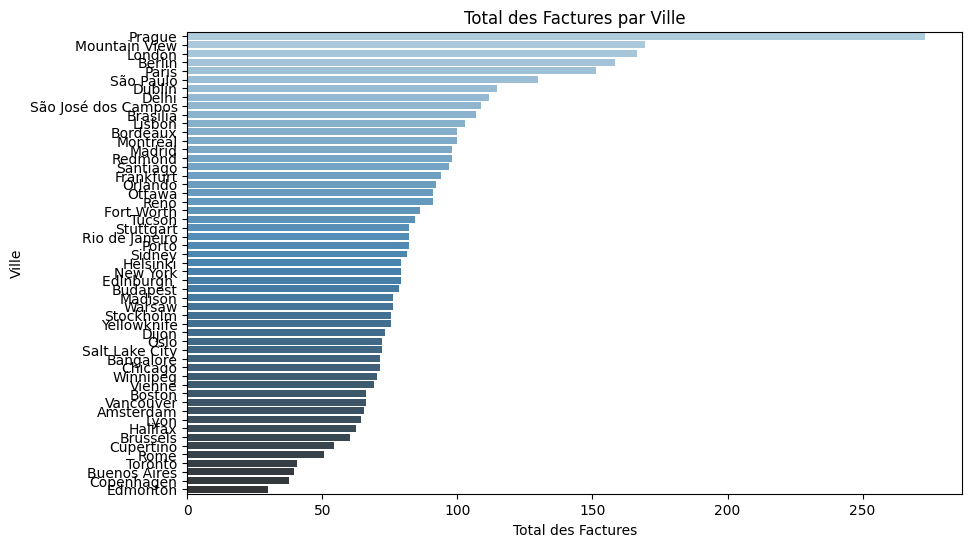

In [130]:
# Calculer le total des factures par ville
total_factures_par_ville = invoice.groupby('billing_city')['total'].sum().reset_index()
total_factures_par_ville = total_factures_par_ville.sort_values(by='total', ascending=False)  # Trier par total décroissant

# Afficher le résultat
#print("Total des factures par ville :")
#print(total_factures_par_ville)

# Créer un graphique à barres
plt.figure(figsize=(10, 6))
sns.barplot(data=total_factures_par_ville, x='total', y='billing_city', palette='Blues_d')

# Ajout de styles et labels
plt.title("Total des Factures par Ville")
plt.xlabel("Total des Factures")
plt.ylabel("Ville")
plt.show()

8 - Calculons le montant total dépensé pour chaque genre et comparez-les

C:\Users\HP\AppData\Local\Temp\ipykernel_48260\2385750843.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=box_plot_data, x='name_y', y='total', palette="Set3")


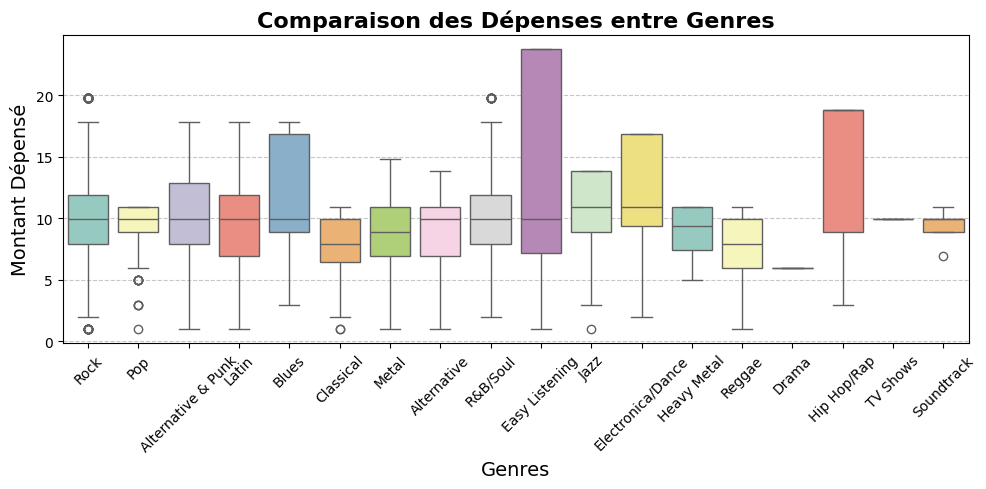

In [140]:
# Fusionner les DataFrames pour calculer les dépenses totales par genre
total_spent_by_genre = (
    invoice
    .merge(invoice_line, on="invoice_id")
    .merge(track, on="track_id")
    .merge(genre, on="genre_id")
    .groupby("name_y")  
    .agg(total_spent=("total", "sum"))
    .reset_index()
)

# Afficher les résultats
#print(total_spent_by_genre)

# Fusionner les DataFrames pour créer les données nécessaires au box plot
box_plot_data = (
    invoice
    .merge(invoice_line, on="invoice_id")
    .merge(track, on="track_id")
    .merge(genre, on="genre_id")
)

# Créer le box plot pour comparer les dépenses entre genres
plt.figure(figsize=(10, 5))
sns.boxplot(data=box_plot_data, x='name_y', y='total', palette="Set3")

# Ajouter des labels et ajuster le style du graphique
plt.title("Comparaison des Dépenses entre Genres", fontsize=16, weight='bold')
plt.xlabel("Genres", fontsize=14)
plt.ylabel("Montant Dépensé", fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()  # Ajuster la mise en page pour éviter les coupures
plt.show()

9 - Calculons le total des achats par client et identifiez les clients les plus 
dépensiers